# Machine Learning

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("iris.csv")

## Feature Engineering / Data Cleaning

these topic of feature engineering are cover in another files in your PC

# Feature Selection

A feature is an attribute that has an impact on a problem or is useful for the problem, and choosing the important features for the model is known as feature selection.

#### encoding for machine learning model

In [3]:
from sklearn.preprocessing import OrdinalEncoder

In [4]:
oe = OrdinalEncoder()

In [5]:
dataset["species"] = oe.fit_transform(dataset[["species"]])

In [6]:
dataset.head(3)

sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2      0.0
1           4.9          3.0           1.4          0.2      0.0
2           4.7          3.2           1.3          0.2      0.0

### Forward Elimination (using MLXTEND)

In [7]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [8]:
x = dataset.iloc[:,:-1]      #separate x-axis and y-axis
y = dataset["species"]

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression()

In [11]:
fs = SequentialFeatureSelector(lr,k_features=3,forward=True)

In [12]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LogisticRegression(), k_features=(3, 3),
                          scoring='accuracy')

In [13]:
fs.feature_names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [14]:
fs.k_feature_names_

('sepal_length', 'petal_length', 'petal_width')

In [15]:
fs.k_score_

np.float64(0.9666666666666668)

In [16]:
# 4 = 0.9733333333333334
# 3 = 0.9666666666666668
# 2 = 0.96
# 1 = 0.96

## Train Test Split in Data Set

In [17]:
dataframe = pd.read_csv("Titanic-Dataset.csv")

In [18]:
dataframe.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

### Data cleaning for machine learning

In [19]:
dataframe.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
dataframe["Age"].fillna(dataframe["Age"].mean(), inplace=True)

C:\Users\Z\AppData\Local\Temp\ipykernel_11088\3341303642.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Age"].fillna(dataframe["Age"].mean(), inplace=True)


In [21]:
dataframe.drop(columns=["Cabin"], inplace=True)

In [22]:
dataframe["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
dataframe["Embarked"].fillna(dataframe["Embarked"].mode()[0],inplace=True)

C:\Users\Z\AppData\Local\Temp\ipykernel_11088\892453461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe["Embarked"].fillna(dataframe["Embarked"].mode()[0],inplace=True)


In [24]:
dataframe.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
dataframe.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S

#### Categorical Encoding

##### Name

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe["Name"] = le.fit_transform(dataframe[["Name"]]) 


C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### Sex

In [27]:
ord_data = {"male":2,"female":3}

In [28]:
dataframe["Sex"] = dataframe["Sex"].map(ord_data)

##### Ticket

In [29]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()    #(categories= ord_data) value/varaiable name
dataframe["Ticket"] = oe.fit_transform(dataframe[["Ticket"]])


##### Embarked

In [30]:
dataframe["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
ord1_data = {"S":4,"C":5,"Q":6}

In [32]:
dataframe["Embarked"] = dataframe["Embarked"].map(ord1_data)

In [33]:
dataframe.head(3)

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    2  22.0      1      0   523.0   
1            2         1       1   190    3  38.0      1      0   596.0   
2            3         1       3   353    3  26.0      0      0   669.0   

      Fare  Embarked  
0   7.2500         4  
1  71.2833         5  
2   7.9250         4

In [34]:
dataframe.shape

(891, 11)

## Train Test Split in Data Set

In [35]:
input_data = dataframe.iloc[:,:-1]
output_data = dataframe["Embarked"]

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(input_data, output_data,test_size=0.25)

In [38]:
x_train.shape

(668, 10)

In [39]:
# use train data when we train machine learning model and use test data when we check accuracy

# Regression Analysis

In a dataset, when determining the type of prediction, you base your decision on the output. If the output or outcome is continuous, you use regression analysis. Otherwise, you use classification analysis.

## Linear Regression Algorithm (Simple Linear)

In [40]:
sl_dataset = pd.read_csv("simple_linear_regression_dataset.csv")

In [41]:
sl_dataset.head(3)

Feature      Target
0  37.454012  107.052589
1  95.071431  266.440285
2  73.199394  202.502724

In [42]:
sl_dataset.isnull().sum()

Feature    0
Target     0
dtype: int64

In [43]:
x = sl_dataset[["Feature"]]
y = sl_dataset["Target"]

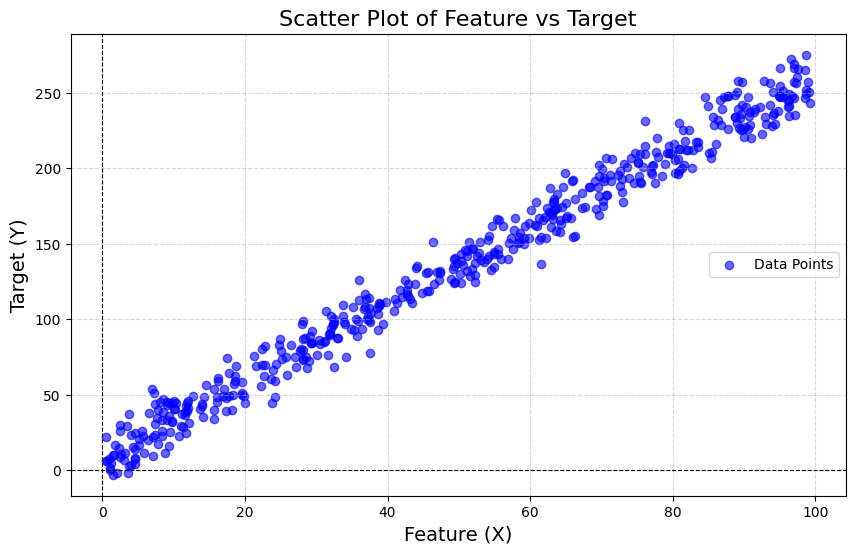

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(x="Feature", y="Target", data=sl_dataset,color='blue', alpha=0.6, label='Data Points')
plt.title('Scatter Plot of Feature vs Target', fontsize=16)
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (Y)', fontsize=14)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

LinearRegression()

In [50]:
lr.score(x_test,y_test)

0.9811807446291563

In [51]:
lr.predict([[37.45012]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([103.26950033])

In [52]:
# y = m*x + c

In [53]:
lr.coef_   # m

array([2.52327729])

In [54]:
lr.intercept_ # c

np.float64(8.772462946297566)

In [55]:
# y=2.52327729*37.454012+8.772462946297566

In [56]:
2.52327729*37.454012+8.772462946297566

103.27932084528503

In [57]:
y_prd = lr.predict(x)

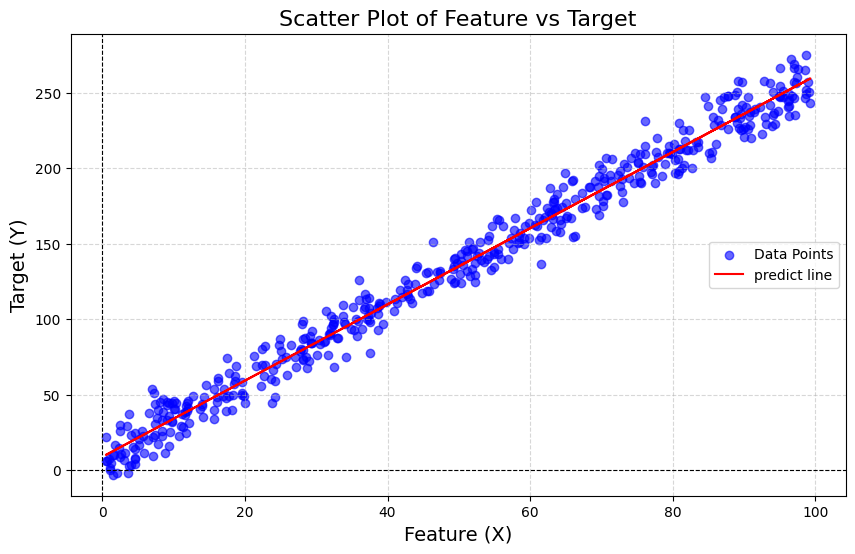

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(x="Feature", y="Target", data=sl_dataset,color='blue', alpha=0.6, label='Data Points')
plt.plot(sl_dataset["Feature"], y_prd,color = "red", label="predict line")
plt.title('Scatter Plot of Feature vs Target', fontsize=16)
plt.xlabel('Feature (X)', fontsize=14)
plt.ylabel('Target (Y)', fontsize=14)
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(x=0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Multiple Linear Regression

In [59]:
ml_dataset = pd.read_csv("multiple_linear_regression_dataset.csv")

In [60]:
ml_dataset.head(3)

Feature1   Feature2    Feature3      Target
0  37.454012  34.908086   37.026586  116.561993
1  95.071431  26.804818  108.380189  516.131582
2  73.199394  15.476381  174.589167  544.718359

In [61]:
ml_dataset.describe()

Feature1    Feature2    Feature3      Target
count  500.000000  500.000000  500.000000  500.000000
mean    49.856171   24.097570  103.511624  341.345034
std     29.868841   14.274673   59.438587  156.201564
min      0.506158    0.231601    0.987996  -18.337770
25%     24.127969   11.454962   48.245610  224.084744
50%     51.316375   23.591078  107.947667  347.443026
75%     75.612488   36.316841  155.468752  444.608770
max     99.296480   49.985884  199.882745  714.864691

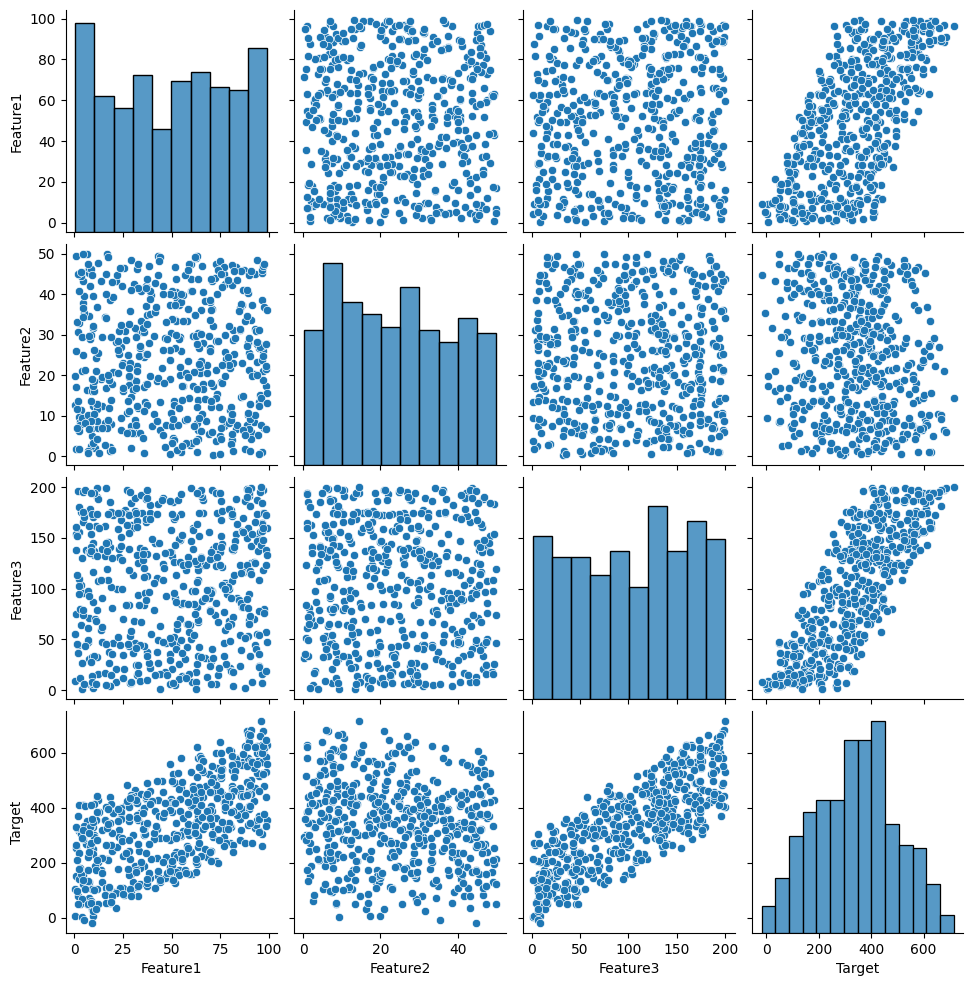

In [62]:
sns.pairplot(data=ml_dataset)
plt.show()

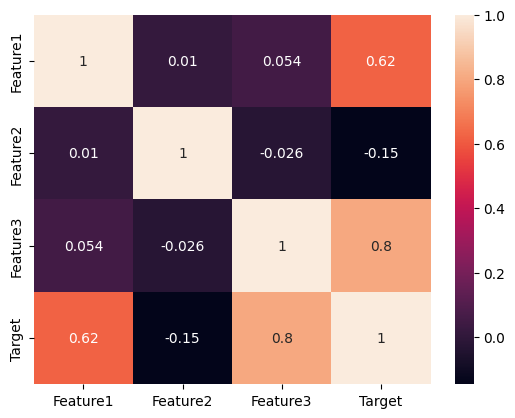

In [63]:
sns.heatmap(data=ml_dataset.corr(), annot=True)
plt.show()

In [64]:
ml_x = ml_dataset.iloc[:,:-1]
ml_y = ml_dataset["Target"]

In [65]:
x.ndim

2

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train, x_test, y_train, y_test = train_test_split(ml_x, ml_y, test_size=0.2, random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
ml_lr = LinearRegression()

In [70]:
ml_lr.fit(x_train, y_train)

LinearRegression()

In [71]:
ml_lr.score(x_test,y_test)*100

98.7576995300787

In [72]:
# y m1*x1+m2*x2+m3*x3+c

In [73]:
ml_lr.coef_

array([ 3.03737113, -1.44414216,  2.0121138 ])

In [74]:
ml_lr.intercept_

np.float64(15.89343046851019)

In [75]:
# y_prd = 3.03737113*Feature1+-1.44414216*Feature2+2.0121138*Feature3+15.89343046851019

## Polynomial Regression

In [76]:
pr_dataset = pd.read_csv("polynomial_regression_dataset.csv")

In [77]:
pr_dataset.head(3)

Feature     Target
0  3.745401   5.104693
1  9.507143  42.313024
2  7.319939  22.562967

In [78]:
pr_dataset.corr()

Feature   Target
Feature  1.00000  0.86889
Target   0.86889  1.00000

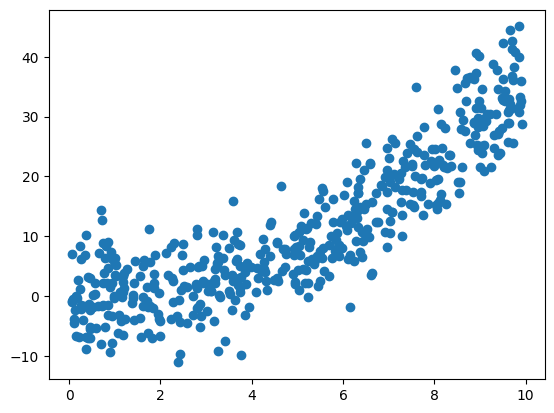

In [79]:
plt.scatter(pr_dataset["Feature"], pr_dataset["Target"])
plt.show()

In [80]:
pr_x = pr_dataset[["Feature"]]
pr_y = pr_dataset["Target"]

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
pf = PolynomialFeatures(degree=3)

In [83]:
pf.fit(pr_x)

PolynomialFeatures(degree=3)

In [84]:
pr_x = pf.transform(pr_x)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(pr_x, pr_y, test_size=0.2,random_state=42)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
pr_lr = LinearRegression()

In [89]:
pr_lr.fit(x_train,y_train)

LinearRegression()

In [90]:
pr_lr.score(x_test,y_test)

0.8014061863562691

In [91]:
# y = m1*x1+m2*x2^2+c
# y = -1.05954074*x1 + 0.46752086*x2^2 - 0.8695309013342438

In [92]:
pr_lr.coef_  # m

array([ 0.        , -0.42383546,  0.30758613,  0.01065521])

In [93]:
pr_lr.intercept_  # c

np.float64(0.363169559517619)

In [94]:
pr_prd = pr_lr.predict(pr_x)

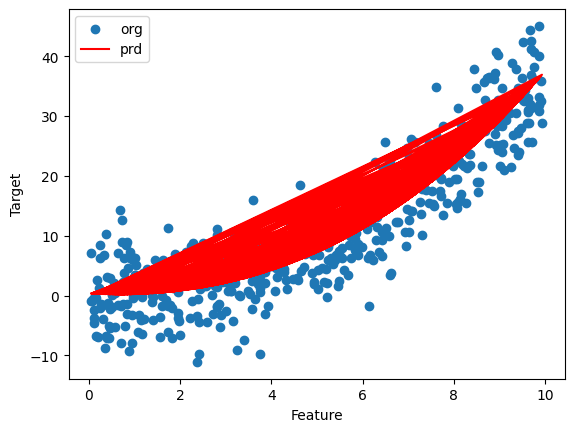

In [95]:
plt.scatter(pr_dataset["Feature"],pr_dataset["Target"])
plt.plot(pr_dataset["Feature"], pr_prd, c="red")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend(["org","prd"])
plt.show()

In [98]:
test = pf.transform([[5]])
test

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[  1.,   5.,  25., 125.]])

In [99]:
pr_lr.predict(test)

array([7.26554701])

## Regularization Techniaque: L1(Lasso Regularization), L2 (Ridge Regularization)

Regularization Technique are used to improve accuracy of the model.

In [147]:
r_dataset = pd.read_csv("regularization_dataset.csv")

In [148]:
r_dataset.head(3)

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0  37.454012  95.071431  73.199394  59.865848  15.601864  15.599452   
1   2.058449  96.990985  83.244264  21.233911  18.182497  18.340451   
2  61.185289  13.949386  29.214465  36.636184  45.606998  78.517596   

   Feature_7  Feature_8  Feature_9  Feature_10      Target  
0   5.808361  86.617615  60.111501   70.807258 -112.218971  
1  30.424224  52.475643  43.194502   29.122914 -110.040941  
2  19.967378  51.423444  59.241457    4.645041  412.079541

#### Check Correlation

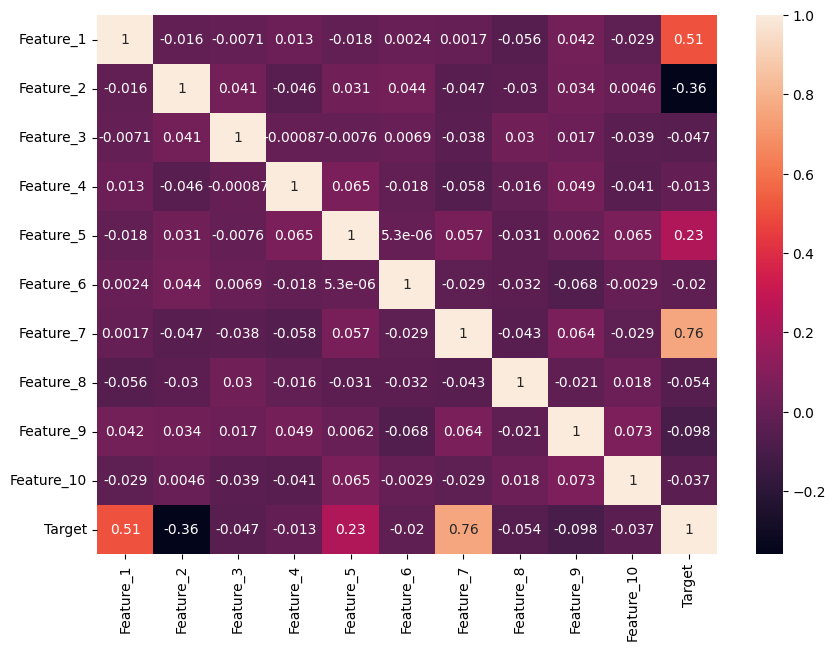

In [149]:
plt.figure(figsize=(10,7))
sns.heatmap(r_dataset.corr(), annot=True)
plt.show()

In [150]:
r_x = r_dataset.iloc[:,:-1]
r_y = r_dataset["Target"]

#### Feature Scaling

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
ss = StandardScaler()

In [153]:
ss.fit(r_x)
r_x  = pd.DataFrame(ss.transform(r_x), columns=r_x.columns)

#### Train Test Split

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
r_x_train, r_x_test, r_y_train, r_y_test = train_test_split(r_x,r_y, test_size=0.2, random_state=42)

#### Linear Regression

In [156]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [157]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [158]:
r_lr = LinearRegression()
r_lr.fit(r_x_train,r_y_train)

LinearRegression()

In [159]:
r_lr.score(r_x_test,r_y_test)*100

99.88739248751754

In [160]:
print(r2_score(r_y_test,r_lr.predict(r_x_test)))
print(mean_squared_error(r_y_test,r_lr.predict(r_x_test)))
print(mean_absolute_error(r_y_test,r_lr.predict(r_x_test)))
print(np.sqrt(mean_squared_error(r_y_test,r_lr.predict(r_x_test))))

0.9988739248751755
80.47809469992261
6.909439928990563
8.97095840475936


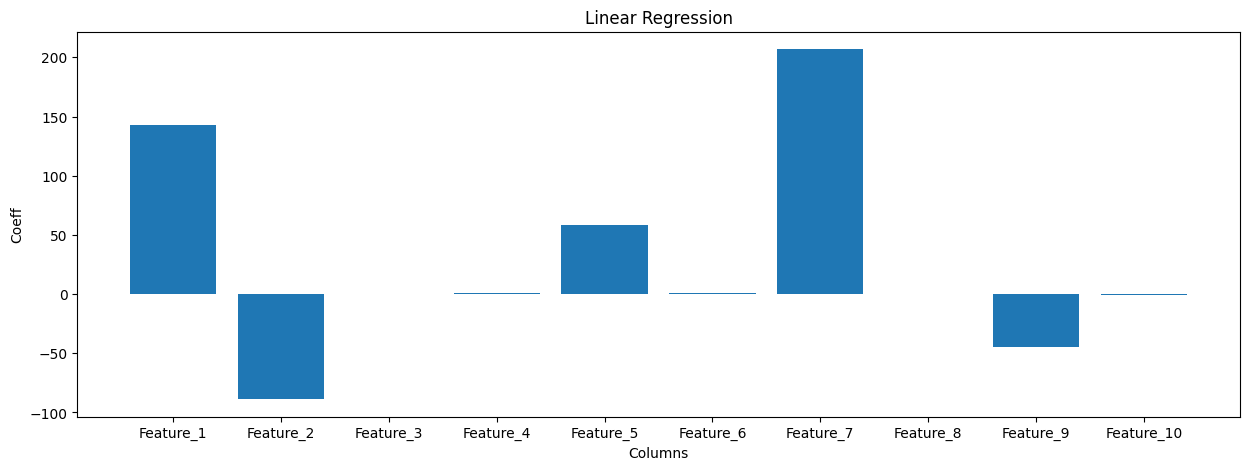

In [161]:
plt.figure(figsize=(15,5))
plt.bar(r_x.columns,r_lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

#### L1 (Lasso Regularization)

In [162]:
ls = Lasso(alpha=0.5)
ls.fit(r_x_train, r_y_train)
ls.score(r_x_test,r_y_test)*100

99.88570826795277

In [164]:
print(mean_squared_error(r_y_test,ls.predict(r_x_test)))
print(mean_absolute_error(r_y_test,ls.predict(r_x_test)))
print(np.sqrt(mean_squared_error(r_y_test,ls.predict(r_x_test))))

81.6817691141888
7.045021961751561
9.03779669577651


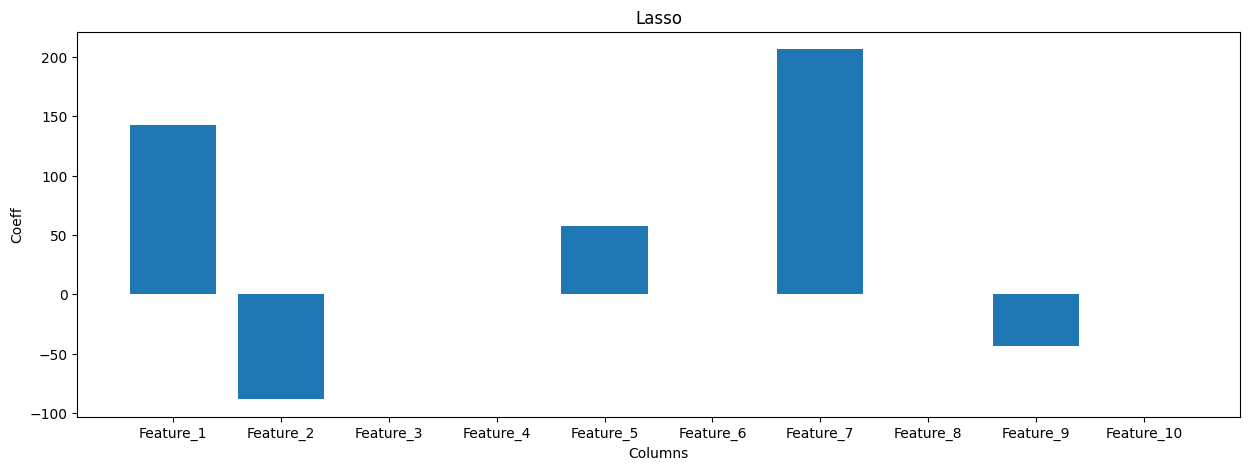

In [165]:
plt.figure(figsize=(15,5))
plt.bar(r_x.columns,ls.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

#### L2 (Ridge Regularization)

In [166]:
ri = Ridge(alpha=10)
ri.fit(r_x_train, r_y_train)
ri.score(r_x_test,r_y_test)*100

99.8113335907345

In [167]:
print(mean_squared_error(r_y_test,ri.predict(r_x_test)))
print(mean_absolute_error(r_y_test,ri.predict(r_x_test)))
print(np.sqrt(mean_squared_error(r_y_test,ri.predict(r_x_test))))

134.83570338105164
8.999238605228726
11.611877685415552


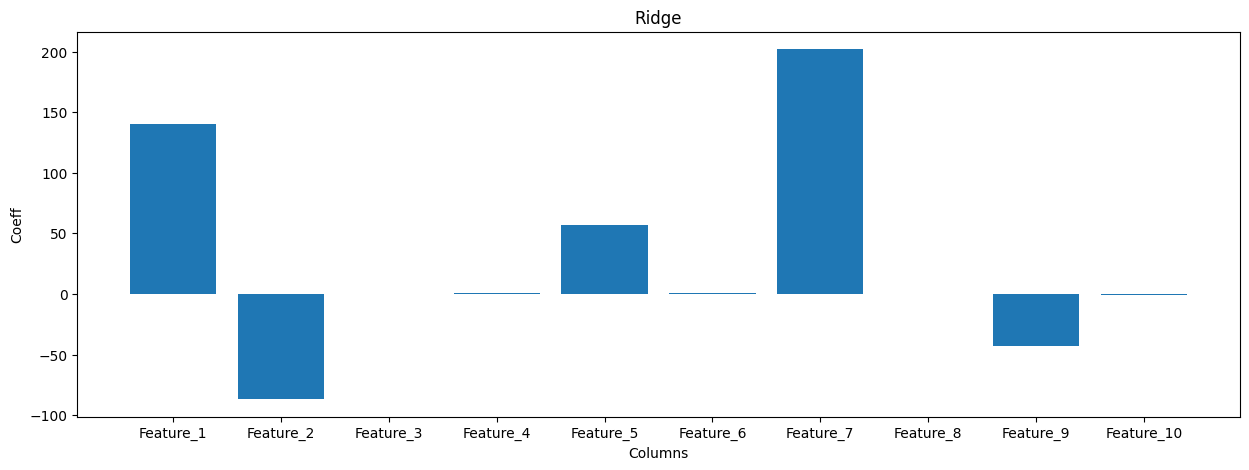

In [168]:
plt.figure(figsize=(15,5))
plt.bar(r_x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("Coeff")
plt.show()

In [170]:
df = pd.DataFrame({"col_name": r_x.columns,"LinearRegression": r_lr.coef_,"Lasso": ls.coef_,"Ridge":ri.coef_})

In [171]:
df

col_name  LinearRegression       Lasso       Ridge
0   Feature_1        143.268992  142.792381  139.807104
1   Feature_2        -88.826439  -88.355859  -86.895274
2   Feature_3          0.377892    0.000000    0.137352
3   Feature_4          1.022563    0.571076    1.027607
4   Feature_5         58.253347   57.742947   57.209676
5   Feature_6          0.969986    0.401277    0.657166
6   Feature_7        206.877831  206.404986  201.898179
7   Feature_8         -0.016048   -0.000000   -0.222574
8   Feature_9        -44.322720  -43.832862  -43.002096
9  Feature_10         -0.526310   -0.095548   -1.000324

# Classification Analysis

## Logistic Regression (Binary Classification)

In [6]:
sp_dataset = pd.read_csv("logistic_regression_student_pass_dataset.csv")

In [7]:
sp_dataset.head()

StudyHours  Pass
0    3.745401     0
1    9.507143     1
2    7.319939     1
3    5.986585     0
4    1.560186     0

In [41]:
sp_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudyHours  500 non-null    float64
 1   Pass        500 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


In [40]:
sp_dataset.describe()

StudyHours        Pass
count  500.000000  500.000000
mean     4.985617    0.516000
std      2.986884    0.500244
min      0.050616    0.000000
25%      2.412797    0.000000
50%      5.131637    1.000000
75%      7.561249    1.000000
max      9.929648    1.000000

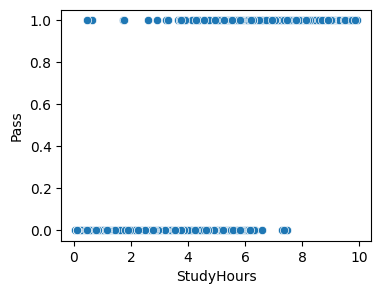

In [12]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="StudyHours", y="Pass", data=sp_dataset)
plt.show()

In [42]:
x = sp_dataset[["StudyHours"]]
y= sp_dataset["Pass"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
blo = LogisticRegression()

In [50]:
blo.fit(x_train,y_train)

LogisticRegression()

In [51]:
blo.score(x_test,y_test)

0.89

In [61]:
blo.predict([[5.1]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

## Logistic Regression (Binary Classification) (Multiple Input)

In [64]:
lo_dataset = pd.read_csv("logistic_regression_customer_purchase_dataset.csv")

In [65]:
lo_dataset.head()

Age  Income  AdClicks  Purchase
0   56   24000        14         0
1   46   90588        23         1
2   32  121042        29         1
3   60  113610        10         0
4   25  140420        15         1

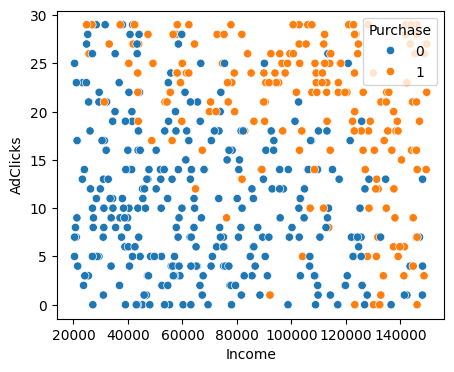

In [70]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Income",y="AdClicks",data=lo_dataset, hue="Purchase")
plt.show()

In [71]:
x = lo_dataset.iloc[:,:-1]
y = lo_dataset["Purchase"]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lo = LogisticRegression()

In [76]:
lo.fit(x_train,y_train)

LogisticRegression()

In [77]:
lo.score(x_test,y_test)

0.84

In [92]:
lo.coef_

array([[3.17147257e-02, 4.57164686e-05, 2.07674592e-01]])

In [93]:
lo.intercept_

array([-8.84224743])

In [83]:
lo.predict([[23,100000, 25]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [84]:
from mlxtend.plotting import plot_decision_regions

## Logistic Regression (Binary Classification) (Polynomial Input)

In [61]:
bp_dataset = pd.read_csv("logistic_regression_heart_disease_dataset.csv")

In [62]:
bp_dataset.head()

BMI  Cholesterol        BMI^2  Cholesterol^2  \
0  26.239883   254.724257   688.531440   64884.447157   
1  38.915715   230.414455  1514.432854   53090.821051   
2  34.103867   196.429142  1163.073725   38584.408001   
3  31.170487   272.069253   971.599238   74021.678404   
4  21.432410   252.709676   459.348202   63862.180285   

   BMI_Cholesterol_Interaction  HeartDisease  
0                  6683.934605             0  
1                  8966.743201             0  
2                  6698.993294             0  
3                  8480.531018             0  
4                  5416.177407             0

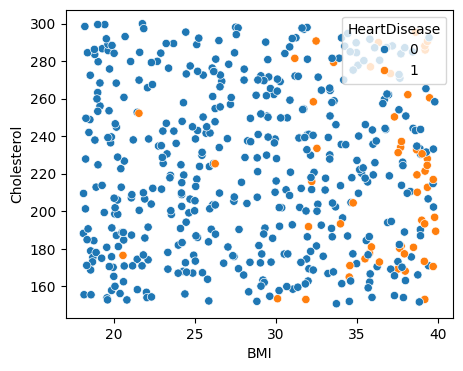

In [63]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="BMI",y="Cholesterol", data=bp_dataset, hue="HeartDisease")
plt.show()

### Simple Logistic Regression

In [64]:
x = bp_dataset[["BMI","Cholesterol"]]
y = bp_dataset["HeartDisease"]

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
lr = LogisticRegression()

In [69]:
lr.fit(x_train, y_train)

LogisticRegression()

In [70]:
lr.score(x_test, y_test)

0.89

In [71]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


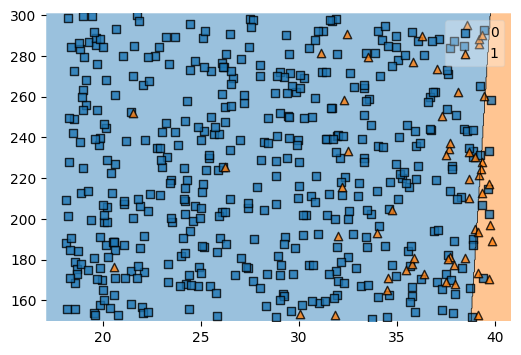

In [72]:
plt.figure(figsize=(6,4))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

### polynomial Feature

In [73]:
xx = bp_dataset[["BMI", "Cholesterol"]]
yy = bp_dataset["HeartDisease"]

In [74]:
from sklearn.preprocessing import PolynomialFeatures

In [75]:
pf = PolynomialFeatures(degree=3)
pf.fit(xx)
xx = pd.DataFrame(pf.transform(xx))

In [76]:
xx_train, xx_test, yy_train, yy_test = train_test_split(xx, yy, test_size=0.2, random_state=42)

In [77]:
lrr = LogisticRegression()

In [78]:
lrr.fit(xx_train, yy_train)

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
lrr.score(xx_test, yy_test)

0.89

## Logistic Regression (Multiclass Classification)

In [2]:
mc_dataset = pd.read_csv("logistic_regression_student_performance_dataset.csv")

In [3]:
mc_dataset.head()

StudyHours  SleepHours  Extracurricular  Attendance  PerformanceCategory
0    3.745401    8.188970                3   79.394219                    3
1    9.507143    7.216578                2   97.429168                    4
2    7.319939    5.857166                4   62.626389                    4
3    5.986585    8.882770                0   67.962537                    4
4    1.560186    8.108387                4   68.967929                    3

In [4]:
mc_dataset["PerformanceCategory"].unique()

array([3, 4, 2, 1])

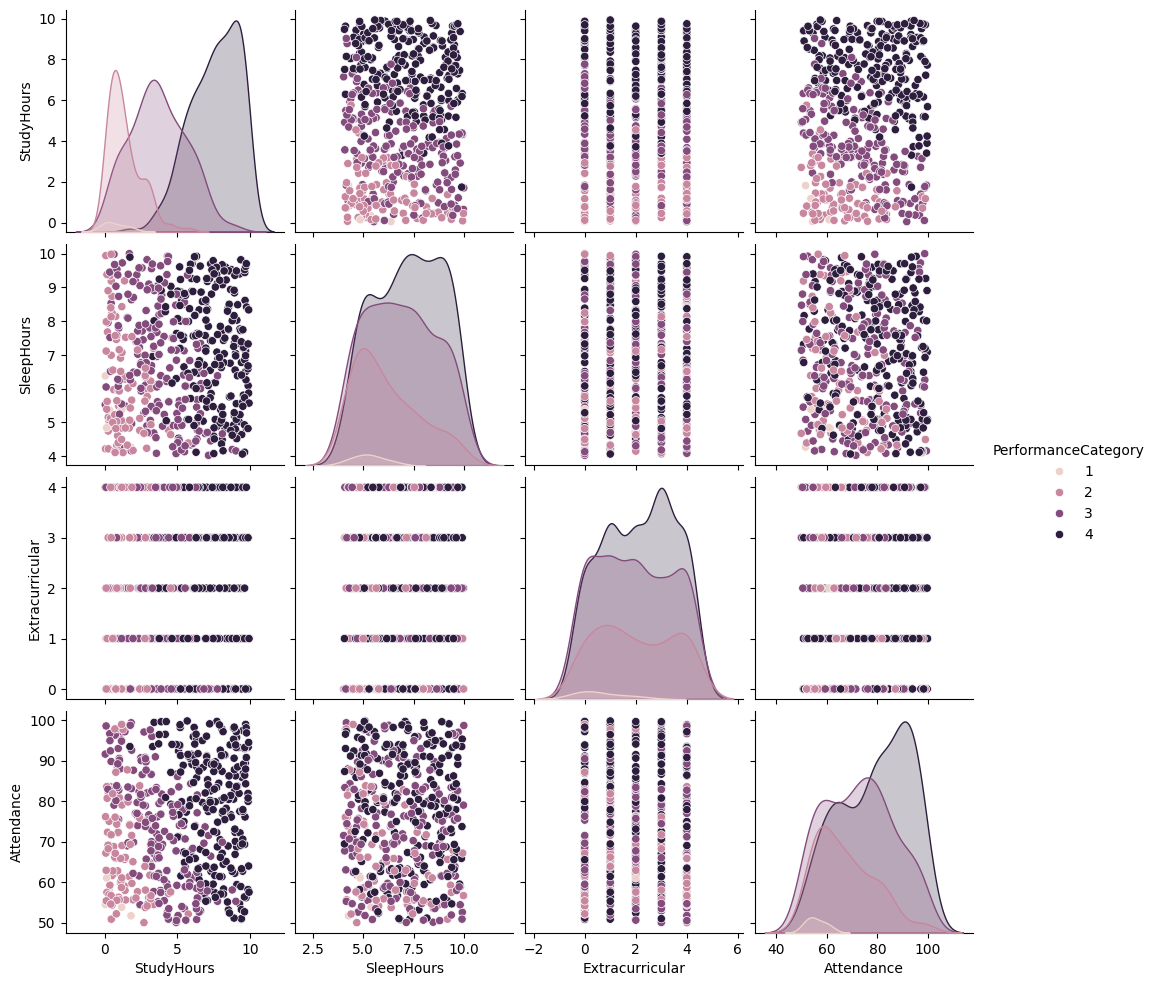

In [5]:
sns.pairplot(data=mc_dataset, hue="PerformanceCategory")
plt.show()

In [6]:
x = mc_dataset.iloc[:,:-1]
y = mc_dataset["PerformanceCategory"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

### OVR Method

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
lr = LogisticRegression(multi_class="ovr")

In [11]:
lr.fit(x_train,y_train)

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [22]:
lr.score(x_test,y_test)

0.96

### Multinomial / Softmax Function

In [23]:
lr1 = LogisticRegression(multi_class="multinomial")

In [24]:
lr1.fit(x_train, y_train)

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [25]:
lr1.score(x_test, y_test)

0.76

## Confusion Matric (Precision, Recall, F1-Score)

In [13]:
cm_dataset = pd.read_csv("logistic_regression_heart_disease_dataset.csv")

In [15]:
cm_dataset.head(3)

BMI  Cholesterol        BMI^2  Cholesterol^2  \
0  26.239883   254.724257   688.531440   64884.447157   
1  38.915715   230.414455  1514.432854   53090.821051   
2  34.103867   196.429142  1163.073725   38584.408001   

   BMI_Cholesterol_Interaction  HeartDisease  
0                  6683.934605             0  
1                  8966.743201             0  
2                  6698.993294             0

In [17]:
x = cm_dataset[["BMI", "Cholesterol"]]
y = cm_dataset["HeartDisease"]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
lr.score(x_test,y_test)

0.89

In [25]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [28]:
cf = confusion_matrix(y_test, lr.predict(x_test))
cf

array([[87,  2],
       [ 9,  2]])

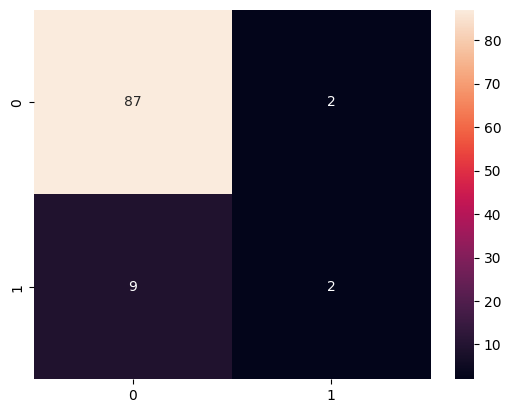

In [29]:
sns.heatmap(cf, annot=True)
plt.show()

In [30]:
precision_score(y_test, lr.predict(x_test))*100

np.float64(50.0)

In [31]:
recall_score(y_test, lr.predict(x_test))*100

np.float64(18.181818181818183)

In [32]:
f1_score(y_test, lr.predict(x_test))*100

np.float64(26.666666666666668)

## Imbalanced Data

In [2]:
id_dataset = pd.read_csv("logistic_regression_heart_disease_dataset.csv")

In [3]:
id_dataset.head(3)

BMI  Cholesterol        BMI^2  Cholesterol^2  \
0  26.239883   254.724257   688.531440   64884.447157   
1  38.915715   230.414455  1514.432854   53090.821051   
2  34.103867   196.429142  1163.073725   38584.408001   

   BMI_Cholesterol_Interaction  HeartDisease  
0                  6683.934605             0  
1                  8966.743201             0  
2                  6698.993294             0

In [5]:
id_dataset["HeartDisease"].value_counts()

HeartDisease
0    445
1     55
Name: count, dtype: int64

In [6]:
x = id_dataset[["BMI", "Cholesterol"]]
y = id_dataset["HeartDisease"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression 

In [11]:
lr = LogisticRegression()

In [12]:
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
lr.score(x_test,y_test)

0.89

### Random Under Sampling

In [23]:
x2 = id_dataset[["BMI", "Cholesterol"]]
y2 = id_dataset["HeartDisease"]

In [24]:
y2.value_counts()

HeartDisease
0    445
1     55
Name: count, dtype: int64

In [25]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
ru = RandomUnderSampler()
ru_x, ru_y = ru.fit_resample(x2,y2) 

In [38]:
ru_y.value_counts()

HeartDisease
0    55
1    55
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x1_train, x1_test, y1_train, y1_test = train_test_split(ru_x, ru_y, test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr1 = LogisticRegression()

In [43]:
lr1.fit(x1_train, y1_train)

LogisticRegression()

In [44]:
lr1.score(x1_test,y1_test)

0.7727272727272727

### Random Over Sampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

In [46]:
ru = RandomOverSampler()
ru_x1, ru_y1 = ru.fit_resample(x2,y2) 

In [47]:
ru_y1.value_counts()

HeartDisease
0    445
1    445
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [48]:
x2_train, x2_test, y2_train, y2_test = train_test_split(ru_x1, ru_y1, test_size=0.2,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr2 = LogisticRegression()

In [52]:
lr2.fit(x2_train, y2_train)

LogisticRegression()

In [53]:
lr1.score(x2_test,y2_test)

0.7752808988764045

## Naive Bayes

In [3]:
from mlxtend.plotting import plot_decision_regions

In [4]:
nb_dataset = pd.read_csv('naive_bayes_email_spam_dataset.csv')

In [5]:
nb_dataset.head()

NumWords  NumLinks  NumSpecialChars  NumUppercaseWords  IsSpam
0       107         1               25                  8       1
1       440         9               33                  8       1
2       353         0               44                 39       1
3       275         7                5                 16       1
4       111         0               36                  0       1

In [6]:
nb_dataset.isnull().sum()

NumWords             0
NumLinks             0
NumSpecialChars      0
NumUppercaseWords    0
IsSpam               0
dtype: int64

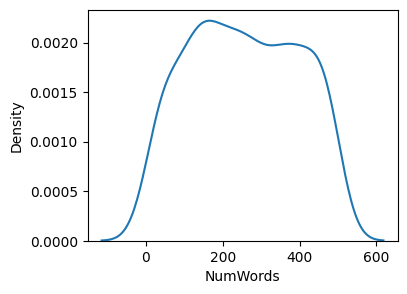

In [19]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumWords"])
plt.show()

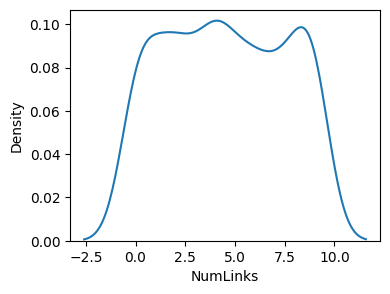

In [21]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumLinks"])
plt.show()

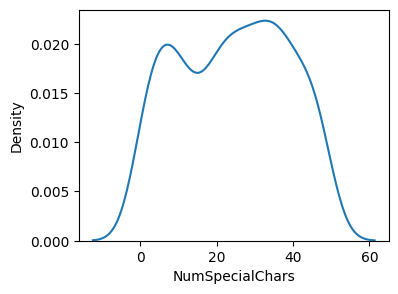

In [22]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumSpecialChars"])
plt.show()

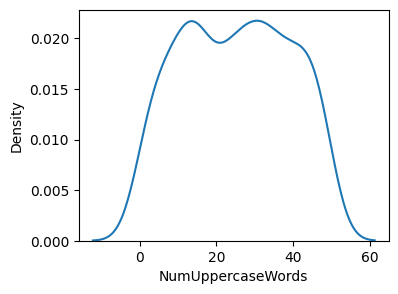

In [23]:
plt.figure(figsize=(4,3))
sns.kdeplot(data=nb_dataset["NumUppercaseWords"])
plt.show()

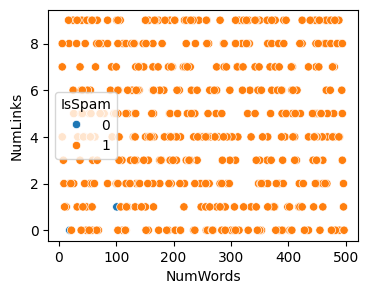

In [20]:
plt.figure(figsize=(4,3))
sns.scatterplot(x='NumWords', y='NumLinks', data =nb_dataset, hue='IsSpam')
plt.show()

In [12]:
x = nb_dataset.iloc[:, :-1]
y = nb_dataset["IsSpam"]

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [26]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [28]:
gnb  = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [34]:
gnb.score(x_train, y_train),gnb.score(x_test, y_test)

(1.0, 0.99)

In [30]:
mnb  = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [36]:
mnb.score(x_train, y_train),mnb.score(x_test, y_test)

(0.755, 0.76)

In [32]:
bnb  = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [35]:
bnb.score(x_train, y_train),bnb.score(x_test, y_test)

(0.9975, 0.99)

## Decision Tree (Classification)

In [2]:
dt_dataset = pd.read_csv("decision_tree_loan_approval_dataset.csv")

In [3]:
dt_dataset.head()

Income  CreditScore  Age  LoanAmount  ExistingLoansCount  LoanApproved
0  141958          460   25       15616                   3             1
1   35795          555   28       42129                   4             0
2   20860          622   58       44837                   3             0
3  123694          427   54       29574                   1             1
4  148106          317   31        8430                   1             1

In [4]:
dt_dataset.isnull().sum()

Income                0
CreditScore           0
Age                   0
LoanAmount            0
ExistingLoansCount    0
LoanApproved          0
dtype: int64

In [5]:
x = dt_dataset.iloc[:,:-1]
y = dt_dataset["LoanApproved"]

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(criterion="entropy")

In [34]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
dt.score(x_test, y_test)*100

97.0

In [36]:
dt.score(x_train, y_train)*100

100.0

In [14]:
dt.predict([[141958, 460, 25, 15616,3]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
from sklearn.tree import plot_tree

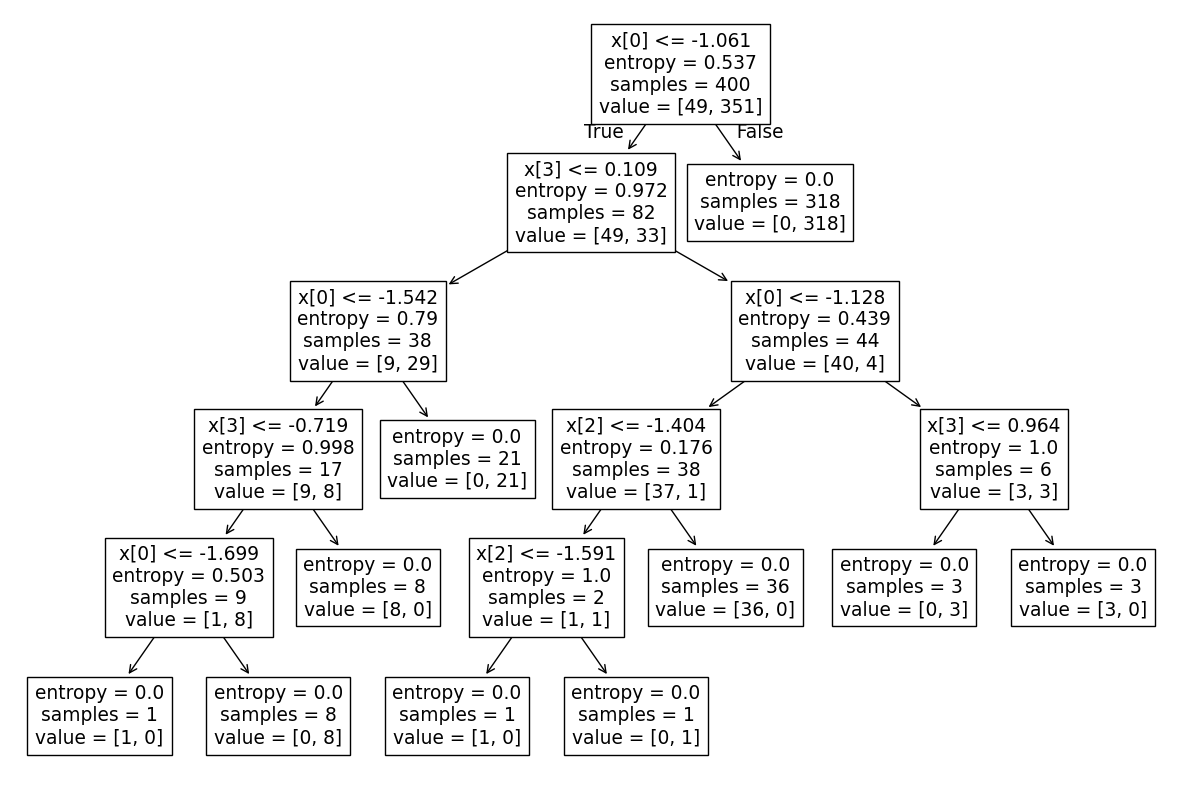

In [16]:
plt.figure(figsize=(15,10))
plot_tree(dt)
plt.show()

## Decision Tree (Regression)

In [4]:
dtr_dataset = pd.read_csv("decision_tree_house_price_dataset.csv")

In [5]:
dtr_dataset.head()

SquareFeet  Bedrooms  HousePrice
0        1360         1      201472
1        4272         1      678707
2        3592         3      588678
3         966         5      258928
4        4926         4      817860

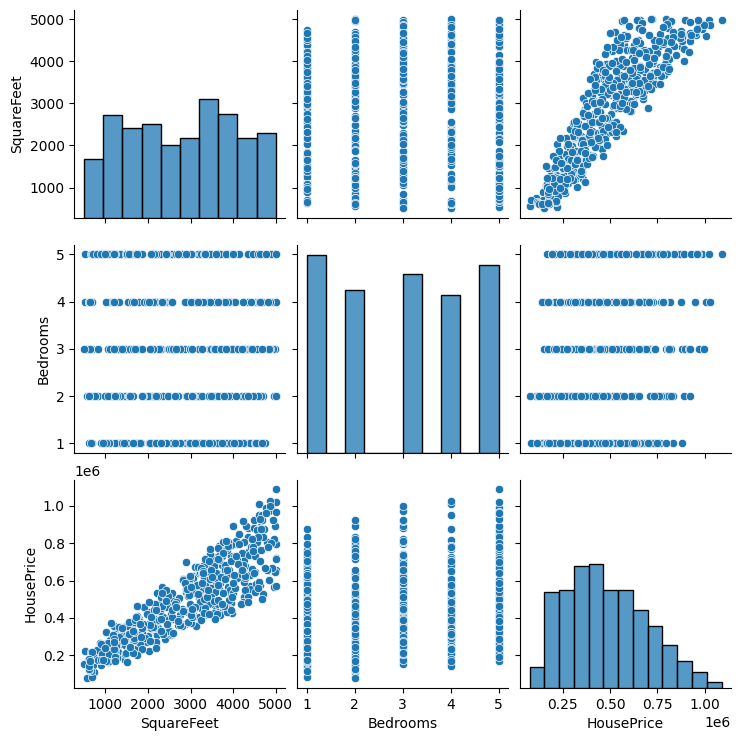

In [6]:
sns.pairplot(data=dtr_dataset)
plt.show()

In [7]:
x = dtr_dataset.iloc[:,:-1]
y = dtr_dataset["HousePrice"]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [22]:
dtr = DecisionTreeRegressor(max_depth=4)

In [23]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [24]:
dtr.score(x_train,y_train)*100, dtr.score(x_test,y_test)*100

(81.70639945503669, 77.87788628664096)

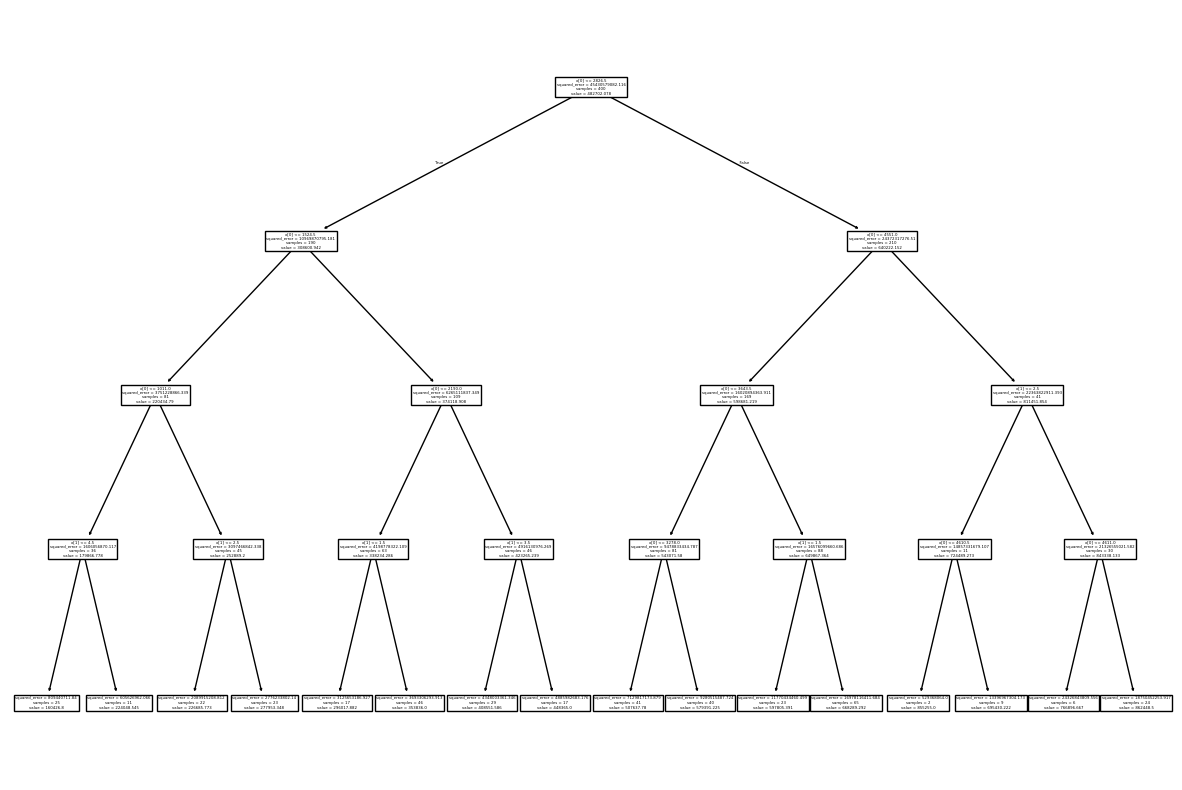

In [25]:
plt.figure(figsize=(15,10))
plot_tree(dtr)
plt.show()

# K-Nearest Neighbors

•	K-NN algorithm can be used for regression as well as for classification but mostly it is used for classification problems.
•	K-NN is a non-parametric algorithm, which means it does not make any assumption on underlying data.
•	It is also called a lazy learner algorithm.

## K-Nearest Neighbors (Classification)

In [70]:
knn_dataset = pd.read_csv("knn_classification_fruit_dataset.csv")

In [71]:
knn_dataset.head()

Weight  SugarContent FruitType
0  243.74          9.08    Orange
1  159.73         13.09     Apple
2  186.88          9.93    Orange
3  192.16         10.03    Orange
4  139.66         10.41     Apple

In [72]:
knn_dataset.shape

(500, 3)

In [73]:
knn_dataset.isnull().sum()

Weight          0
SugarContent    0
FruitType       0
dtype: int64

In [74]:
knn_dataset.describe()

Weight  SugarContent
count  500.000000    500.000000
mean   150.055320     10.512540
std     29.061063      2.115605
min     80.870000      4.430000
25%    129.685000      8.887500
50%    150.790000     10.230000
75%    168.437500     12.132500
max    243.740000     16.330000

In [75]:
x = knn_dataset.iloc[:,:-1]
y = knn_dataset["FruitType"]

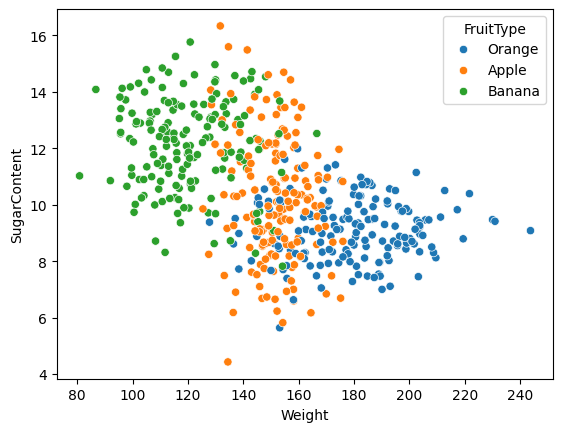

In [76]:
sns.scatterplot(x="Weight", y="SugarContent", data=knn_dataset, hue="FruitType")
plt.show()

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
knc = KNeighborsClassifier(n_neighbors=3,p=1)

In [81]:
knc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, p=1)

In [82]:
knc.score(x_test,y_test)*100, knc.score(x_train,y_train)*100

(82.0, 85.5)

In [83]:
knc.predict([[186.88, 9.93]])

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Orange'], dtype=object)

## K-Nearest Neighbors (Regression)

In [85]:
knr_dataset = pd.read_csv("knn_regression_car_dataset.csv")

In [86]:
knr_dataset.head()

EngineSize  CarWeight  FuelEfficiency
0        2.50    2396.32           19.12
1        4.80    2072.19           10.88
2        3.93    1619.06           13.29
3        3.39    2627.59           15.27
4        1.62    2369.46           22.23

In [88]:
knr_dataset.isnull().sum()

EngineSize        0
CarWeight         0
FuelEfficiency    0
dtype: int64

In [89]:
x = knr_dataset.iloc[:,:-1]
y = knr_dataset["FuelEfficiency"]

In [90]:
from sklearn.preprocessing import StandardScaler

In [93]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x))

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [112]:
knr = KNeighborsRegressor(n_neighbors=20, p=1)

In [113]:
knr.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=20, p=1)

In [114]:
knr.score(x_test, y_test)

0.5956889405331407

# Support Vector Machine

SVM is one of the most popular Supervised Learning Algorithm, which is used for Classification as well as Regression Problems.

## Support Vector Machine (Classification)

In [3]:
svm_dataset = pd.read_csv("svm_classification_dataset.csv")

In [4]:
svm_dataset.head()

BMI  GlucoseLevel  Diabetes
0  27.48        127.79         0
1  24.31        157.28         0
2  28.24         58.04         0
3  32.62        116.89         0
4  23.83         80.48         0

In [5]:
svm_dataset.isnull().sum()

BMI             0
GlucoseLevel    0
Diabetes        0
dtype: int64

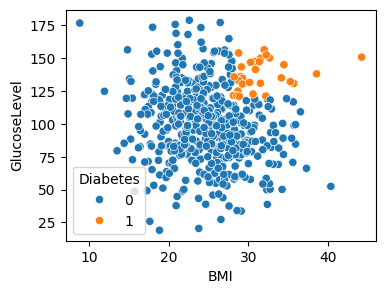

In [7]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="BMI", y="GlucoseLevel", data=svm_dataset, hue="Diabetes")
plt.show()

In [8]:
x = svm_dataset.iloc[:,:-1]
y = svm_dataset["Diabetes"]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import SVC

In [51]:
sv = SVC(kernel="poly")  # linear, poly, rbf, sigmoid, precomputed

In [52]:
sv.fit(x_train,y_train)

SVC(kernel='poly')

In [53]:
sv.score(x_test, y_test), sv.score(x_train, y_train)

(0.96, 0.97)

In [54]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Z\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


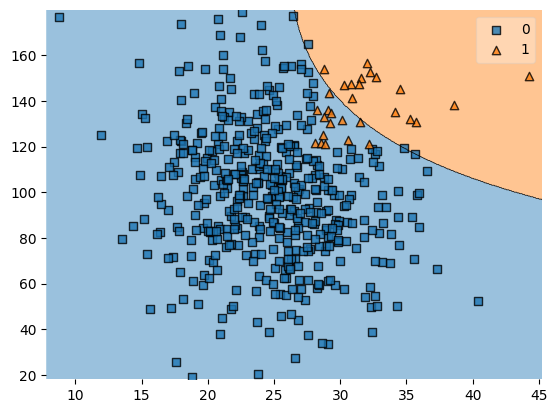

In [55]:
plot_decision_regions(x.to_numpy(),y.to_numpy(), clf=sv)
plt.show()

## Support Vector Machine (Regression)

In [74]:
svr_dataset = pd.read_csv("svm_regression_dataset.csv")

In [75]:
svr_dataset.head(3)

HouseSize  NumRooms      Price
0    1623.62         6  502790.47
1    3352.14         7  894255.99
2    2695.98         1  740348.47

In [76]:
svr_dataset.isnull().sum()

HouseSize    0
NumRooms     0
Price        0
dtype: int64

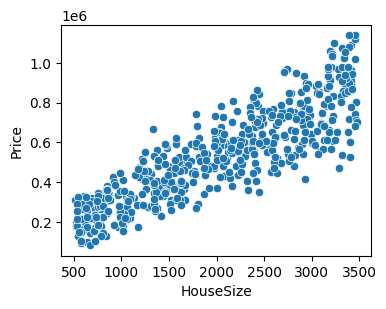

In [77]:
plt.figure(figsize=(4,3))
sns.scatterplot(x="HouseSize", y="Price", data=svr_dataset)
plt.show()

In [134]:
x = svr_dataset.iloc[:,:-1]
y = svr_dataset["Price"]

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [137]:
from sklearn.svm import SVR

In [171]:
svr = SVR(kernel="linear") # linear, poly, rbf, sigmoid, precomputed

In [172]:
svr.fit(x_train,y_train) 

SVR(kernel='linear')

In [173]:
svr.score(x_test,y_test)*100, svr.score(x_train,y_train)*100

(77.64713882353267, 74.55742554928678)

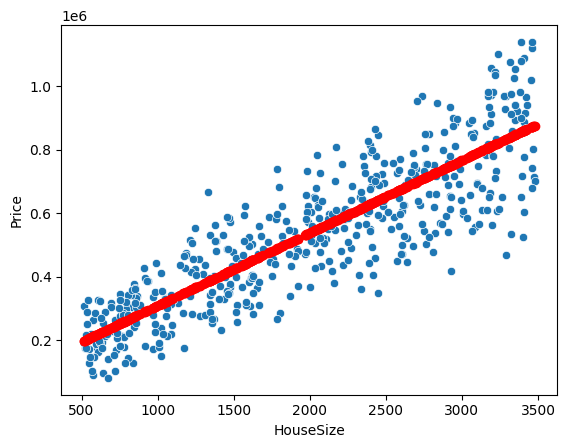

In [174]:
sns.scatterplot(x="HouseSize", y="Price", data=svr_dataset)
plt.scatter(svr_dataset["HouseSize"], svr.predict(x), color="red")
plt.show()

## Hperparameter, Hyperparameter Tuning, Model Parameter

### Model Parameter

Model Parameter are configuration variables that are internal to the model, and a model learn them on its own.

### Hyperparameter

Hyper Parameter are those parameters that are explicitly defined by the user to control the learning process.

### Hyperparameter Tuning

Models can have many parameters and finding the best combination of parameters can be treated as a search problem. The two best categories for hyper parameter tuning are:\
•	GridSearchCV\
•	RandomizedSearchCV


## GridSearchCV

In [9]:
gs_dataset = pd.read_csv("decision_tree_loan_approval_dataset.csv")

In [10]:
gs_dataset.head()

Income  CreditScore  Age  LoanAmount  ExistingLoansCount  LoanApproved
0  141958          460   25       15616                   3             1
1   35795          555   28       42129                   4             0
2   20860          622   58       44837                   3             0
3  123694          427   54       29574                   1             1
4  148106          317   31        8430                   1             1

In [12]:
X = gs_dataset.iloc[:,:-1]
y = gs_dataset["LoanApproved"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
df = DecisionTreeClassifier(criterion = 'gini', max_depth= 4, splitter= 'best')

In [39]:
df.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [40]:
df.score(X_test, y_test), df.score(X_train,y_train)

(0.95, 0.995)

In [21]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [32]:
df = {
    "criterion": ["gini", "entropy", "log_loss"],  # valid for classification
    "splitter": ["best", "random"],
    "max_depth": [i for i in range(2, 20)]
}

In [33]:
gd = GridSearchCV(DecisionTreeClassifier(), param_grid=df)

In [34]:
gd.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [36]:
gd.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

In [37]:
gd.best_score_

0.9774999999999998

### RandomizedSearchCV

Same you can used RandomizedSearchCV to change some code above GridSearchCV.

## Cross-Validation in Machine Learning

In [42]:
cv_dataset = pd.read_csv('simple_linear_regression_dataset.csv')

In [43]:
cv_dataset.head(3)

Feature      Target
0  37.454012  107.052589
1  95.071431  266.440285
2  73.199394  202.502724

In [44]:
X = cv_dataset.iloc[:,:-1]
y = cv_dataset['Target']

In [45]:
from sklearn.linear_model import LinearRegression

In [56]:
from sklearn.model_selection import cross_val_score, LeaveOneOut, LeavePOut, KFold, StratifiedKFold

In [64]:
p = cross_val_score(LinearRegression(),X,y, cv=KFold(n_splits=10)) # cv=5, cv=LeaveOneOut(), LeavePOut(p=2), KFold(n_splits=10), StratifiedKFold(n_splits=10)

In [65]:
p.sort()
p

array([0.97404228, 0.97978572, 0.9816123 , 0.98183109, 0.9820487 ,
       0.98275505, 0.98363147, 0.98381715, 0.98451633, 0.98569363])

# Unsupervised Learning in Machine Learning

Unsupervised learning is a type of machine learning that learns from unlabeled data. \
This means that the data does not have any pre-existing labels or categories. \
The goal of unsupervised learning is to discover patterns and relationships in the data without any explicit guidance.

## K-Means Clustering

In [2]:
km_dataset = pd.read_csv('kmeans_clustering_dataset.csv')

In [3]:
km_dataset.head()

AnnualIncome  SpendingScore
0      32483.57          34.11
1      29308.68          39.48
2      33238.44          28.77
3      37615.15          26.23
4      28829.23          25.55

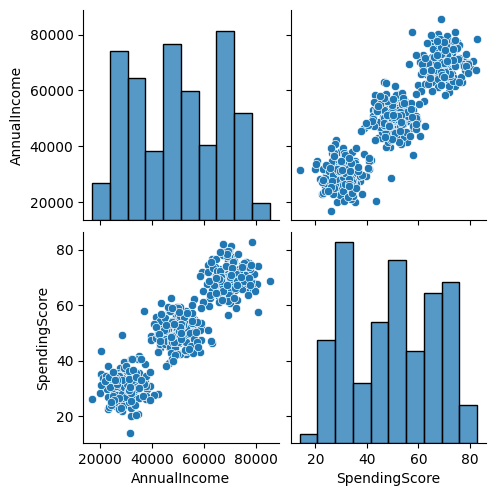

In [4]:
sns.pairplot(data=km_dataset)
plt.show()

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(km_dataset)
    wcss.append(km.inertia_)

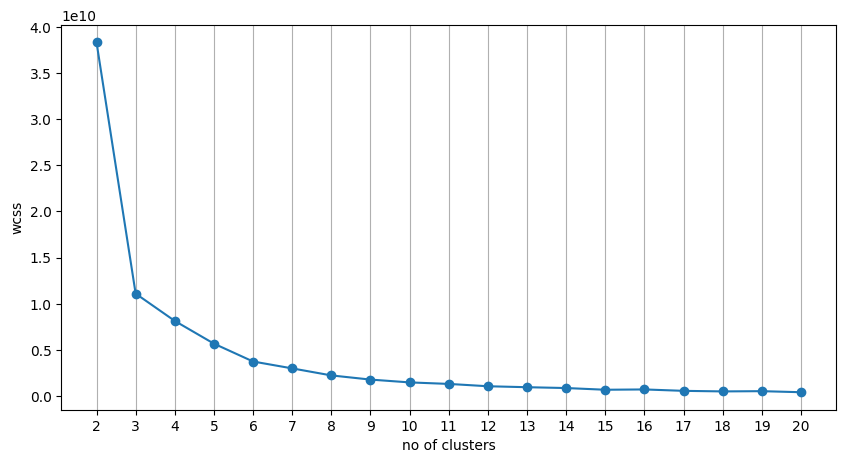

In [34]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss, marker="o")
plt.xlabel("no of clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis ='x')
plt.show()

In [8]:
knn = KMeans(n_clusters=3)
km_dataset["Predict"] = knn.fit_predict(km_dataset)

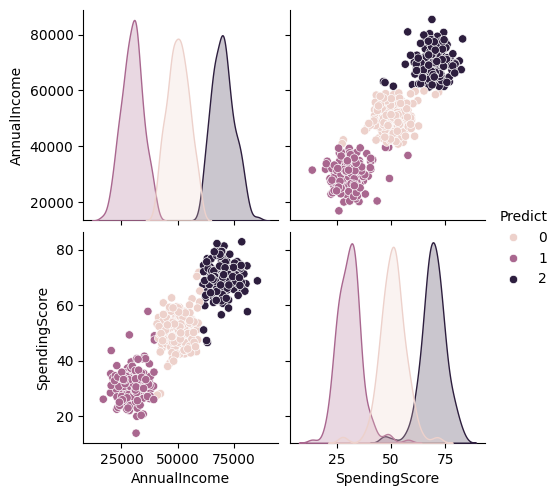

In [33]:
sns.pairplot(data=km_dataset, hue="Predict")
plt.show()

## Hierarchical Clustering (Agglomerative)

In [10]:
hc_dataset = pd.read_csv('iris.csv')
hc_dataset = hc_dataset.drop(columns='species')

In [11]:
hc_dataset.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [12]:
# sns.pairplot(data=hc_dataset)
# plt.show()

In [13]:
import scipy.cluster.hierarchy as sc

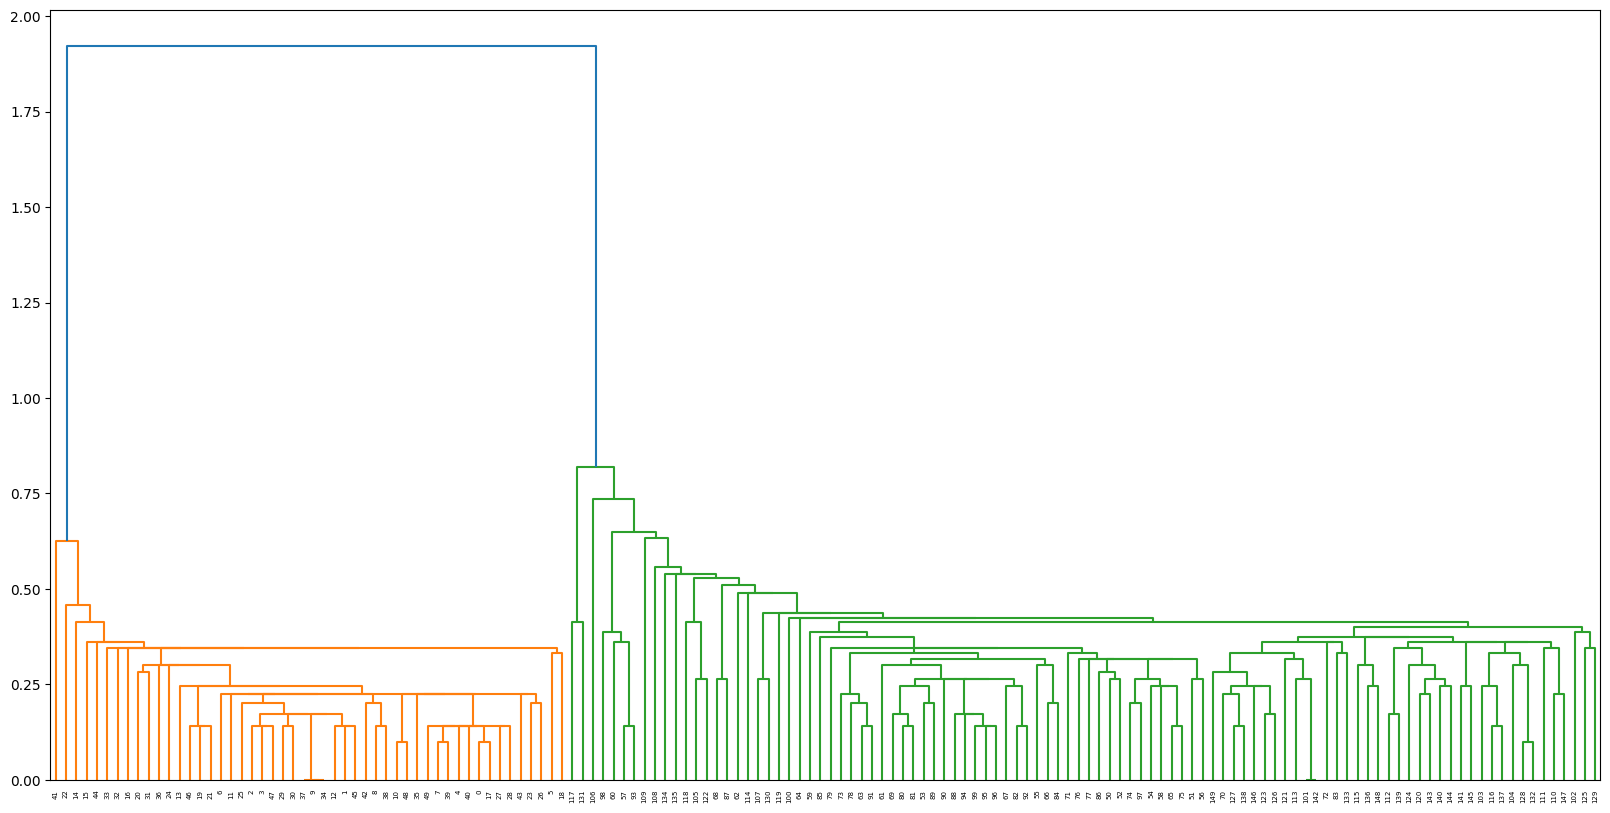

In [35]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(hc_dataset, method='single', metric='euclidean'))
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [16]:
ac = AgglomerativeClustering(n_clusters=2,linkage='single')
hc_dataset['Predict'] = ac.fit_predict(hc_dataset)

In [17]:
hc_dataset.head(3)

sepal_length  sepal_width  petal_length  petal_width  Predict
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1

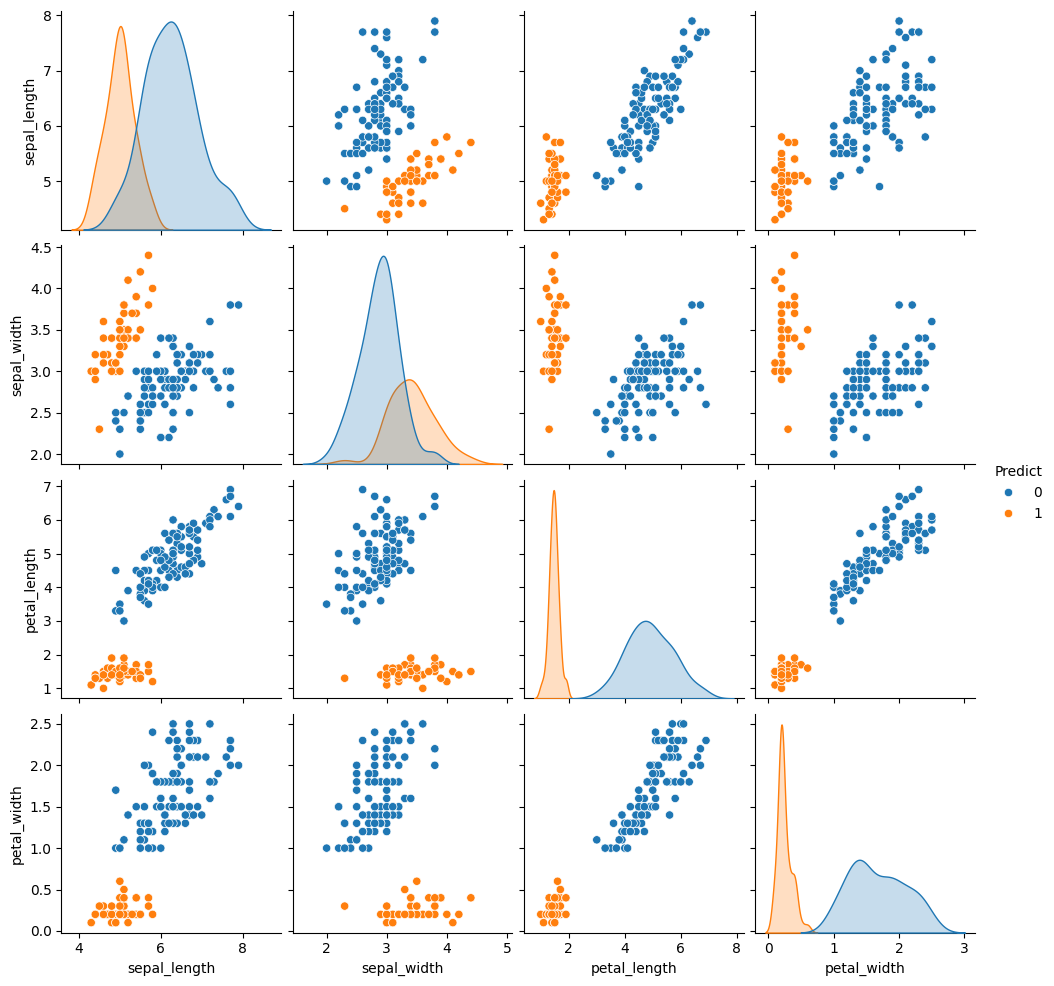

In [36]:
sns.pairplot(data=hc_dataset, hue='Predict')
plt.show()

## DBSCAN Clustering

In [9]:
db_dataset = pd.read_csv('dbscan_clustering_dataset.csv')
db_dataset.head()

Latitude  Longitude
0  20.993428  19.723471
1  21.295377  23.046060
2  19.531693  19.531726
3  23.158426  21.534869
4  19.061051  21.085120

In [10]:
db_dataset.isnull().sum()

Latitude     0
Longitude    0
dtype: int64

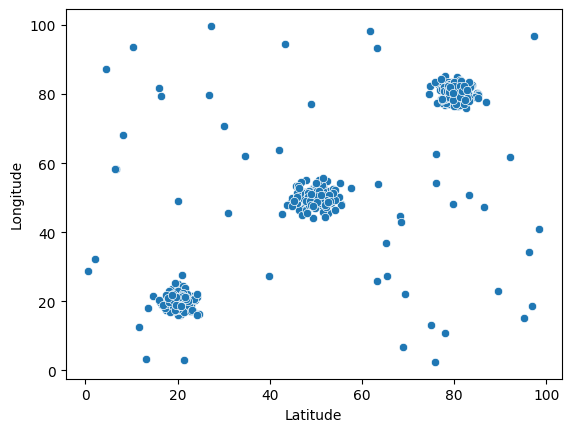

In [11]:
sns.scatterplot(x='Latitude', y='Longitude', data=db_dataset)
plt.show()

In [12]:
from sklearn.cluster import DBSCAN

In [13]:
db = DBSCAN(eps=0.4, min_samples=5)
db_dataset['Predict'] = db.fit_predict(db_dataset)

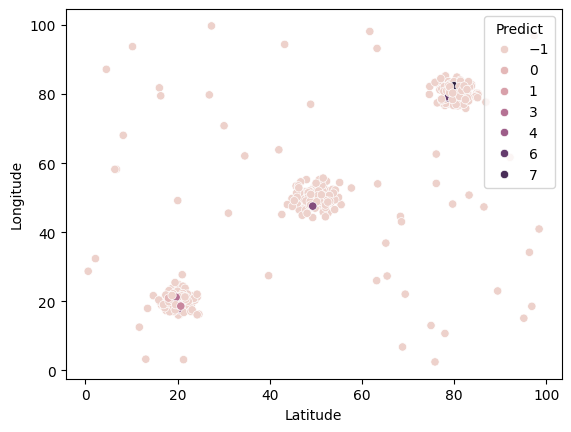

In [15]:
sns.scatterplot(x='Latitude', y='Longitude', data=db_dataset, hue='Predict')
plt.show()

In [16]:
db_dataset['Predict'].unique()

array([-1,  0,  1,  4,  2,  3,  5,  7,  8,  6], dtype=int64)

## Silhouette Score

In [17]:
km_dataset = pd.read_csv('kmeans_clustering_dataset.csv')
km_dataset.head(3)

AnnualIncome  SpendingScore
0      32483.57          34.11
1      29308.68          39.48
2      33238.44          28.77

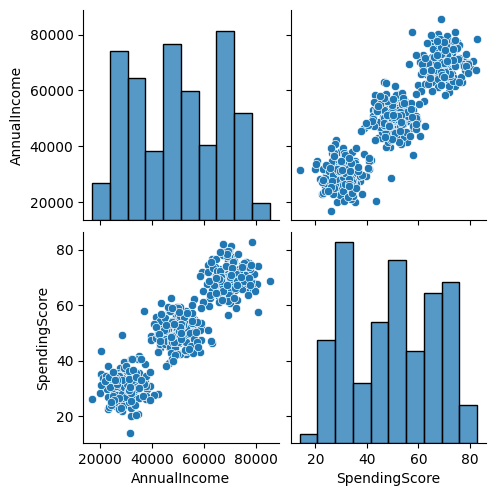

In [18]:
sns.pairplot(data=km_dataset)
plt.show()

In [19]:
from sklearn.cluster import KMeans

In [20]:
wcss = []
for i in range(2,21):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(km_dataset)
    wcss.append(km.inertia_)

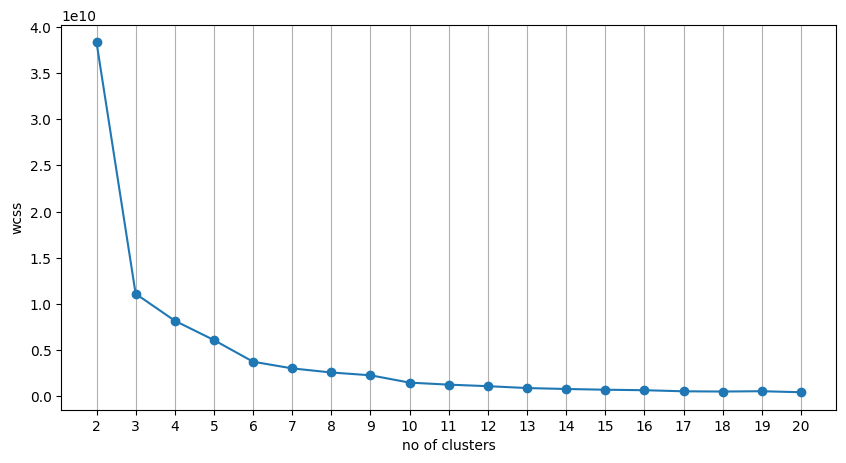

In [21]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range(2,21)],wcss, marker="o")
plt.xlabel("no of clusters")
plt.xticks([i for i in range(2,21)])
plt.ylabel("wcss")
plt.grid(axis ='x')
plt.show()

In [22]:
knn = KMeans(n_clusters=3)
km_dataset["Predict"] = knn.fit_predict(km_dataset)

In [25]:
from sklearn.metrics import silhouette_score

In [28]:
silhouette_score(km_dataset, labels=knn.labels_)

0.6902390856817394

In [30]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(km_dataset)
    ss.append(silhouette_score(km_dataset,km1.labels_))

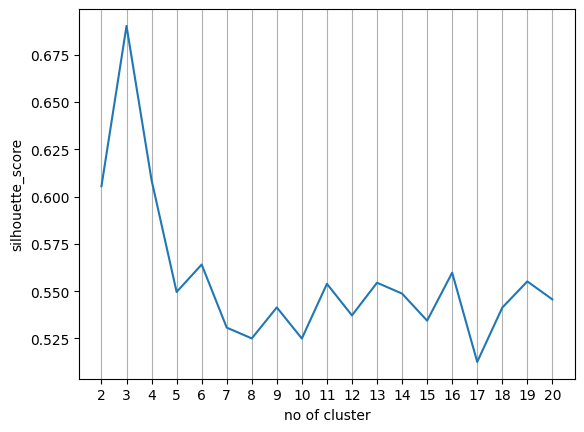

In [31]:
plt.plot(no_c,ss)
plt.xlabel('no of cluster')
plt.ylabel('silhouette_score')
plt.xticks(no_c)
plt.grid(axis='x')
plt.show()

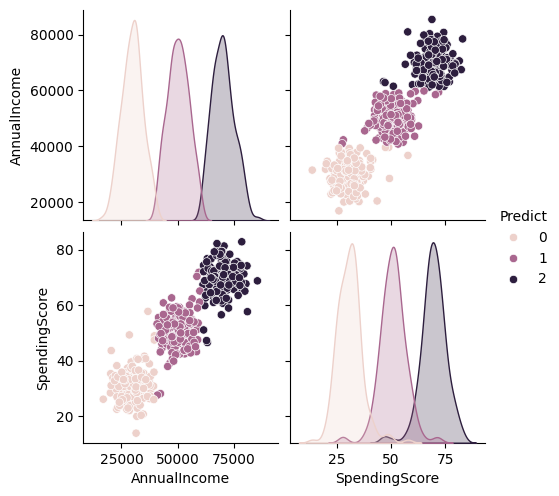

In [23]:
sns.pairplot(data=km_dataset, hue="Predict")
plt.show()

# Association Rules Learning
Association rule learning is a learning technique used to discover interesting relationships and patterns in large datasets. \
It is often apply to transactional data, where items are bought or used together.

## Apriori Algorithm Learning

In [3]:
a_dataset = pd.read_csv("apriori_raw_transactions.csv")

In [4]:
a_dataset.head(3)

Transaction_ID                                  Items
0               1  Pasta, Cookies, Eggs, Cereal, Bananas
1               2          Eggs, Juice, Chicken, Cookies
2               3       Cheese, Chicken, Bananas, Butter

In [5]:
a_dataset.shape

(500, 2)

In [14]:
market = []     # remove nan values
for i in range(0,a_dataset.shape[0]):
    cus = []
    for j in a_dataset.columns:
        if type(a_dataset[j][i])==str:
            cus.append(a_dataset[j][i])
    market.append(cus)

In [15]:
l = []
for i in market:
    for j in i:
        l.append(j)

In [9]:
import collections

In [59]:
p = collections.Counter(l)

In [61]:
d = {"Item Name": p.keys(), "values": p.values()}

In [62]:
# pd.DataFrame(d).sort_values(by=["values"],ascending=False)

In [29]:
from mlxtend.preprocessing.transactionencoder import TransactionEncoder

In [63]:
tr = TransactionEncoder()
tr.fit(market)

TransactionEncoder()

In [64]:
df = pd.DataFrame(tr.transform(market), columns=tr.columns_)

In [65]:
from mlxtend.frequent_patterns import apriori

In [67]:
apriori(df, min_support = 0.05, use_colnames=True)

Empty DataFrame
Columns: [support, itemsets]
Index: []

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Load the dataset
df = pd.read_csv("apriori_raw_transactions.csv")

# Step 2: Split items by comma to create list of transactions
transactions = df["Items"].apply(lambda x: x.split(", ")).tolist()

# Step 3: One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

# Step 4: Apply Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display top rules
print("Frequent Itemsets:\n", frequent_itemsets.head())
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


Frequent Itemsets:
    support   itemsets
0    0.214   (Apples)
1    0.210  (Bananas)
2    0.210     (Beef)
3    0.184    (Bread)
4    0.214   (Butter)

Association Rules:
   antecedents consequents  support  confidence      lift
0    (Apples)    (Cheese)    0.050    0.233645  1.145318
1    (Cheese)    (Apples)    0.050    0.245098  1.145318
2    (Apples)      (Rice)    0.054    0.252336  1.087657
3      (Rice)    (Apples)    0.054    0.232759  1.087657
4    (Apples)   (Shampoo)    0.052    0.242991  1.094552


## Frequent Pattern Growth Algorithm (Association rule) learning

In [4]:
df1 = pd.read_csv("apriori_raw_transactions.csv")

In [6]:
df1.head(3)

Transaction_ID                                  Items
0               1  Pasta, Cookies, Eggs, Cereal, Bananas
1               2          Eggs, Juice, Chicken, Cookies
2               3       Cheese, Chicken, Bananas, Butter

In [7]:
# Step 2: Split items by comma to create list of transactions
transactions = df1["Items"].apply(lambda x: x.split(", ")).tolist()

In [13]:
# Step 3: One-hot encode the transactions
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [22]:
# Step 4: Apply FP Growth algorithm
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.05, use_colnames=True)

In [23]:
# Step 5: Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [24]:
# Display top rules
print("Frequent Itemsets:\n", frequent_itemsets.head())
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

Frequent Itemsets:
    support   itemsets
0    0.224   (Cereal)
1    0.210  (Bananas)
2    0.200     (Eggs)
3    0.182  (Cookies)
4    0.180    (Pasta)

Association Rules:
   antecedents consequents  support  confidence      lift
0    (Cereal)      (Rice)    0.054    0.241071  1.039101
1      (Rice)    (Cereal)    0.054    0.232759  1.039101
2   (Bananas)   (Shampoo)    0.052    0.247619  1.115401
3   (Shampoo)   (Bananas)    0.052    0.234234  1.115401
4      (Eggs)      (Milk)    0.056    0.280000  1.261261


# Ensemble Learning
The max voting method is generally used for classification problems. In this technique, multiple models are used to make predictions for each data point.\
Take an average of predictions from all the models and use it to make the final prediction.

## Max Voting, Averaging & Weighted Voting (Classification)

In [2]:
from sklearn.datasets import make_moons

In [3]:
x, y = make_moons(n_samples=1000, noise=0.2)

In [4]:
df = {"x1":x[:,0], "x2":x[:,1],"y":y}

In [9]:
dataset = pd.DataFrame(df)

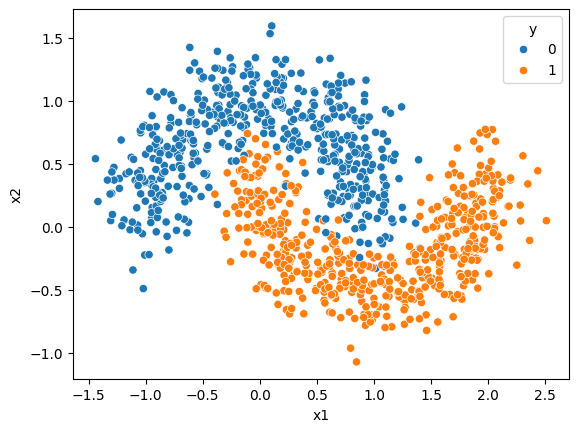

In [10]:
sns.scatterplot(x="x1", y="x2", data=dataset, hue="y")
plt.show()

In [11]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_a, y_a, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [28]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(100.0, 95.5)

In [29]:
sv = SVC()
sv.fit(x_train, y_train)
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(97.25, 98.0)

In [30]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)*100, gnb.score(x_test, y_test)*100

(85.875, 87.5)

In [31]:
from sklearn.ensemble import VotingClassifier

In [35]:
li = [('dt1',DecisionTreeClassifier()), ('sv1',SVC()), ('gnb1',GaussianNB())]

In [36]:
vc = VotingClassifier(li)
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [37]:
vc.score(x_train, y_train)*100, vc.score(x_test, y_test)*100

(97.625, 97.0)

In [38]:
pred = {"dt": dt.predict(x_test), "svm": sv.predict(x_test), "gnb":gnb.predict(x_test), "vote":vc.predict(x_test)}

In [41]:
pd.DataFrame(pred)

dt  svm  gnb  vote
0     1    1    1     1
1     0    0    0     0
2     0    0    0     0
3     0    0    0     0
4     0    0    0     0
..   ..  ...  ...   ...
195   0    0    0     0
196   1    0    0     0
197   0    0    1     0
198   0    0    1     0
199   1    1    1     1

[200 rows x 4 columns]

## Max Voting, Averaging & Weighted Voting (Regression)

In [107]:
r_dataset = pd.read_csv("knn_regression_car_dataset.csv")

In [109]:
r_dataset.head(3)

EngineSize  CarWeight  FuelEfficiency
0        2.50    2396.32           19.12
1        4.80    2072.19           10.88
2        3.93    1619.06           13.29

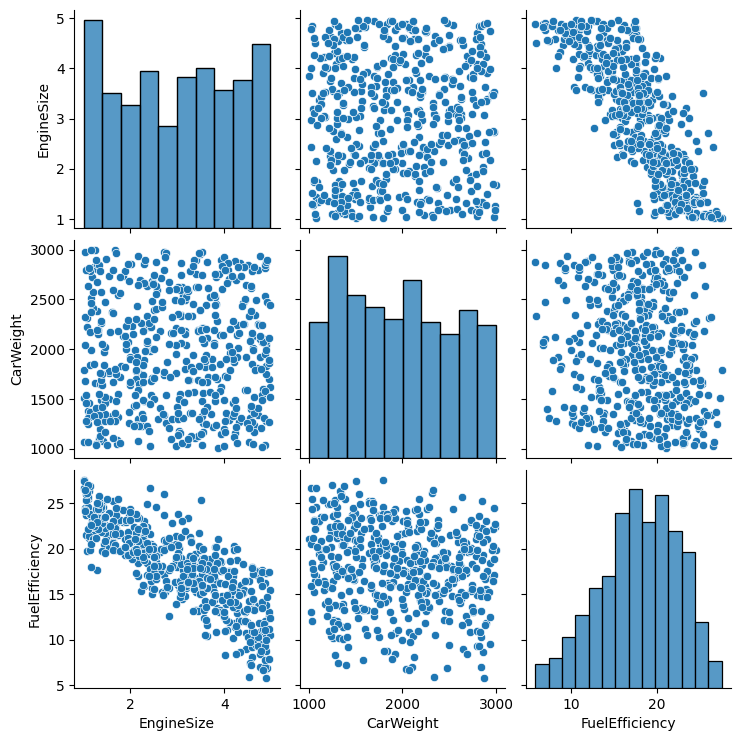

In [110]:
sns.pairplot(r_dataset)
plt.show()

In [111]:
x = r_dataset.iloc[:,:-1]
y = r_dataset["FuelEfficiency"]

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [126]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)*100, lr.score(x_test, y_test)*100

(70.88965585559286, 62.47564591674636)

In [127]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
dt.score(x_train, y_train)*100, dt.score(x_test, y_test)*100

(100.0, 13.65348251888876)

In [128]:
sv = SVR()
sv.fit(x_train, y_train)
sv.score(x_train, y_train)*100, sv.score(x_test, y_test)*100

(0.9576387951913956, 2.384859990946564)

In [129]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)*100, knn.score(x_test, y_test)*100

(25.781101562037357, -7.13372885172856)

In [118]:
from sklearn.ensemble import VotingRegressor

In [139]:
li = [("dt1", DecisionTreeRegressor()), ("sv1", SVR()), ("knn1",KNeighborsRegressor()), ("lr",LinearRegression())]

In [150]:
vr = VotingRegressor(li, weights=[10,20,15, 18])
vr.fit(x_train, y_train)

VotingRegressor(estimators=[('dt1', DecisionTreeRegressor()), ('sv1', SVR()),
                            ('knn1', KNeighborsRegressor()),
                            ('lr', LinearRegression())],
                weights=[10, 20, 15, 18])

In [151]:
vr.score(x_train, y_train)*100, vr.score(x_test, y_test)*100

(63.41767690623957, 47.44190969471763)

In [152]:
pred = {"dt": dt.predict(x_test),"svm": sv.predict(x_test),"knn": knn.predict(x_test), "lr": lr.predict(x_test),"vote": vr.predict(x_test)}

In [153]:
pd.DataFrame(pred)

dt        svm     knn         lr       vote
0   17.77  18.629884  16.302  16.162224  17.234091
1   15.17  18.034254  14.772  13.545735  15.520449
2   24.34  19.387570  17.050  24.525877  21.085193
3   22.22  19.352254  15.958  22.070506  19.775940
4   17.99  19.357012  15.746  13.574765  16.628191
..    ...        ...     ...        ...        ...
95  22.41  17.087183  21.174  22.495672  20.450409
96  16.09  19.381226  20.274  15.955217  18.092515
97  14.77  17.146824  18.370  13.841675  15.749788
98   8.27  19.359305  18.954  16.173910  16.592484
99  23.13  19.387570  19.260  23.083414  20.970680

[100 rows x 5 columns]